In [ ]:
#1. Write a Python program to simulate the following scenarios: 
 #a. Tossing a coin 10,000 times and calculating the experimental probability of heads
#and tails. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

In [4]:
# 1a. Tossing a coin 10,000 times
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

def coin_toss_simulation(trials=10000):
    outcomes = [random.choice(['H', 'T']) for _ in range(trials)]
    head_prob = outcomes.count('H') / trials
    tail_prob = outcomes.count('T') / trials
    return head_prob, tail_prob

coin_toss_simulation()    #Probability of Heads: 0.494  Probability of Tails: 0.506




(0.5089, 0.4911)

In [7]:
## b. Rolling two dice and computing the probability of getting a sum of 7
print("Rolling two dice and computing the probability of getting a sum of 7")
num_trials = 100000 # Increased trials for better estimation
sum_7_count = 0

for _ in range(num_trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7_count += 1

prob_sum_7 = sum_7_count / num_trials
print(f"Experimental probability of getting a sum of 7: {prob_sum_7:.4f}\n")

Rolling two dice and computing the probability of getting a sum of 7
Experimental probability of getting a sum of 7: 0.1655



In [11]:

# 2. Probability of at least one "6" in 10 rolls of a fair die
print(" Probability of at least one '6' in 10 rolls of a fair die")

def estimate_prob_at_least_one_six(num_simulations=10000):
    success_count = 0
    for _ in range(num_simulations):
        rolls = [random.randint(1, 6) for _ in range(10)] # Simulate 10 rolls [cite: 5, 6]
        if 6 in rolls: # Check if at least one 6 occurred [cite: 5]
            success_count += 1
    return success_count / num_simulations # Calculate proportion of successful trials [cite: 7]

prob_at_least_one_six = estimate_prob_at_least_one_six()
print(f"Estimated probability of getting at least one '6' in 10 rolls:{prob_at_least_one_six:.4f}\n")


 Probability of at least one '6' in 10 rolls of a fair die
Estimated probability of getting at least one '6' in 10 rolls:0.8390



In [13]:
# 3. Conditional Probability and Bayes' Theorem
print("Conditional Probability and Bayes' Theorem")

# Bag contents
red_balls = 5
green_balls = 7
blue_balls = 8
total_balls = red_balls + green_balls + blue_balls

bag = ['red'] * red_balls + ['green'] * green_balls + ['blue'] * blue_balls

num_repetitions = 1000 # Process repeated 1000 times [cite: 9]
drawn_balls = []

for _ in range(num_repetitions):
    drawn_ball = random.choice(bag) # Draw a ball randomly [cite: 8]
    drawn_balls.append(drawn_ball)
    # The ball is put back into the bag, so no need to modify 'bag' [cite: 8]
    # a. Probability of drawing a red ball given that the previous ball was blue.
print("3a. Probability of drawing a red ball given that the previous ball was blue.")

Conditional Probability and Bayes' Theorem
3a. Probability of drawing a red ball given that the previous ball was blue.


In [14]:
# Let's simulate the actual sequence and compute from it for verification
previous_blue_current_red_count = 0
previous_blue_count = 0

for i in range(1, num_repetitions):
    if drawn_balls[i-1] == 'blue':
        previous_blue_count += 1
        if drawn_balls[i] == 'red':
            previous_blue_current_red_count += 1

# If previous_blue_count is 0, avoid division by zero
if previous_blue_count > 0:
    prob_red_given_previous_blue = previous_blue_current_red_count / previous_blue_count
else:
    prob_red_given_previous_blue = 0

print(f"Estimated P(Red | Previous Blue) from simulation: {prob_red_given_previous_blue:.4f}")

# The theoretical probability of drawing a red ball is 5/20 = 0.25
theoretical_prob_red = red_balls / total_balls
print(f"Theoretical P(Red): {theoretical_prob_red:.4f}")
print("As the draws are independent (ball is put back), P(Red | Previous Blue) should theoretically be equal to P(Red).\n")



Estimated P(Red | Previous Blue) from simulation: 0.2254
Theoretical P(Red): 0.2500
As the draws are independent (ball is put back), P(Red | Previous Blue) should theoretically be equal to P(Red).



In [16]:
# b. Verify Bayes' theorem with the simulation results.
print("3b. Verify Bayes' theorem with the simulation results.")

# Bayes' Theorem states: P(A|B) = P(B|A) * P(A) / P(B)
# Let A = Drawing a Red ball
# Let B = Drawing a Blue ball (as the previous ball)

# In our independent scenario, P(A|B) = P(A) and P(B|A) = P(B)
# So Bayes' Theorem becomes P(A) = P(B) * P(A) / P(B) which simplifies to P(A) = P(A).
# This is a bit trivial for independent events.
# Let's instead consider A = "Current ball is Red" and B = "Previous ball was Blue".

# From simulation:
# P(Current Red)
current_red_count = drawn_balls.count('red')
sim_p_red = current_red_count / num_repetitions
print(f"Simulated P(Current Red) (P(A)): {sim_p_red:.4f}")

# P(Previous Blue)
sim_p_previous_blue = previous_blue_count / (num_repetitions - 1) # Total possible previous events
print(f"Simulated P(Previous Blue) (P(B)): {sim_p_previous_blue:.4f}")

# P(Previous Blue | Current Red) - P(B|A)
# Count where current is Red AND previous was Blue, divided by count where current is Red.
current_red_previous_blue_count = 0
for i in range(1, num_repetitions):
    if drawn_balls[i] == 'red':
        if drawn_balls[i-1] == 'blue':
            current_red_previous_blue_count += 1

if current_red_count > 0:
    sim_p_previous_blue_given_current_red = current_red_previous_blue_count / current_red_count
else:
    sim_p_previous_blue_given_current_red = 0
print(f"Simulated P(Previous Blue | Current Red) (P(B|A)): {sim_p_previous_blue_given_current_red:.4f}")

# Verify Bayes' Theorem: P(A|B) = P(B|A) * P(A) / P(B)
# Left Hand Side (LHS): P(Current Red | Previous Blue)
lhs = prob_red_given_previous_blue

# Right Hand Side (RHS): P(Previous Blue | Current Red) * P(Current Red) / P(Previous Blue)
# Handle potential division by zero if sim_p_previous_blue is 0
if sim_p_previous_blue > 0:
    rhs = sim_p_previous_blue_given_current_red * sim_p_red / sim_p_previous_blue
else:
    rhs = 0 # If P(B) is 0, RHS is undefined or 0

print(f"LHS (Simulated P(Red | Previous Blue)): {lhs:.4f}")
print(f"RHS (P(B|A) * P(A) / P(B)): {rhs:.4f}")

# Check if LHS is approximately equal to RHS
if abs(lhs - rhs) < 0.05: # Using a small tolerance for floating point comparison
    print("Bayes' theorem is approximately verified with simulation results (due to independence).\n")
else:
    print("Bayes' theorem is not closely verified with simulation results. This could be due to the independent nature of the draws or insufficient simulation trials.\n")
print("Note: In this scenario, since the ball is put back, the draws are independent. For independent events A and B, P(A|B) = P(A) and P(B|A) = P(B). Bayes' theorem still holds true, but its application is less insightful as it simplifies to P(A) = P(A).\n")



3b. Verify Bayes' theorem with the simulation results.
Simulated P(Current Red) (P(A)): 0.2570
Simulated P(Previous Blue) (P(B)): 0.3864
Simulated P(Previous Blue | Current Red) (P(B|A)): 0.3385
LHS (Simulated P(Red | Previous Blue)): 0.2254
RHS (P(B|A) * P(A) / P(B)): 0.2252
Bayes' theorem is approximately verified with simulation results (due to independence).

Note: In this scenario, since the ball is put back, the draws are independent. For independent events A and B, P(A|B) = P(A) and P(B|A) = P(B). Bayes' theorem still holds true, but its application is less insightful as it simplifies to P(A) = P(A).



In [17]:
# 4. Random Variables and Discrete Probability
print("4. Random Variables and Discrete Probability")

# Given distribution
outcomes = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4] # P(X=1)=0.25, P(X=2)=0.35, P(X=3)=0.4 [cite: 12]

sample_size = 1000
# Generate a sample from the discrete random variable [cite: 13]
sample = np.random.choice(outcomes, size=sample_size, p=probabilities)

# Compute empirical mean, variance, and standard deviation [cite: 13]
empirical_mean = np.mean(sample)
empirical_variance = np.var(sample)
empirical_std_dev = np.std(sample)

print(f"Empirical Mean: {empirical_mean:.4f}")
print(f"Empirical Variance: {empirical_variance:.4f}")
print(f"Empirical Standard Deviation: {empirical_std_dev:.4f}\n")

# For comparison, theoretical mean and variance
# E[X] = sum(x * P(X=x))
# E[X^2] = sum(x^2 * P(X=x))
# Var(X) = E[X^2] - (E[X])^2
theoretical_mean = (1 * 0.25) + (2 * 0.35) + (3 * 0.4)
theoretical_mean_sq = (1**2 * 0.25) + (2**2 * 0.35) + (3**2 * 0.4)
theoretical_variance = theoretical_mean_sq - (theoretical_mean**2)
theoretical_std_dev = np.sqrt(theoretical_variance)
# print(f"Theoretical Mean: {theoretical_mean:.4f}")
# print(f"Theoretical Variance: {theoretical_variance:.4f}")
# print(f"Theoretical Standard Deviation: {theoretical_std_dev:.4f}\n")


4. Random Variables and Discrete Probability
Empirical Mean: 2.1500
Empirical Variance: 0.6535
Empirical Standard Deviation: 0.8084



5. Continuous Random Variables


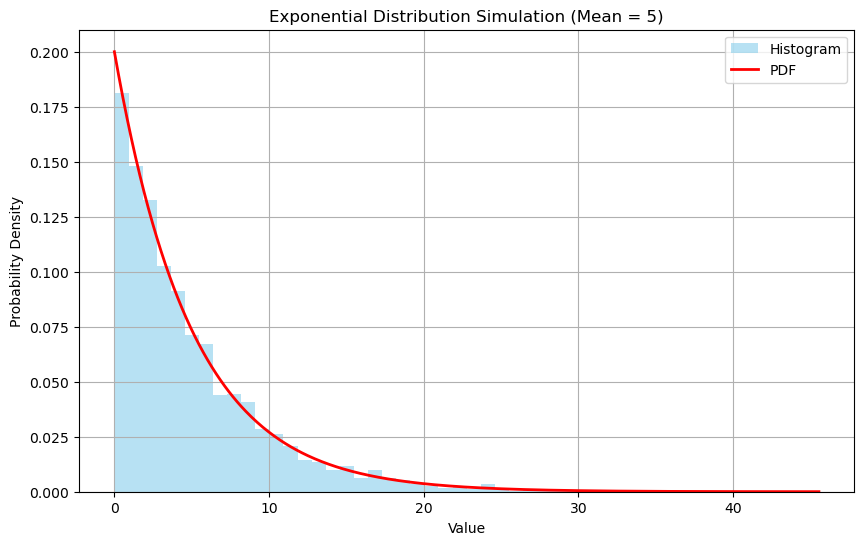

In [19]:
# 5. Continuous Random Variables
print("5. Continuous Random Variables")

mean_exponential = 5
num_samples_exp = 2000

# Simulate random samples from an exponential distribution [cite: 14]
exponential_samples = np.random.exponential(scale=mean_exponential, size=num_samples_exp)

plt.figure(figsize=(10, 6))

# a. Histogram [cite: 15]
plt.hist(exponential_samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Histogram')

# b. Probability Density Function (PDF) overlay
# For an exponential distribution, PDF is f(x; lambda) = lambda * exp(-lambda * x)
# where lambda = 1 / mean
lambda_val = 1 / mean_exponential
x = np.linspace(0, max(exponential_samples), 500)
pdf = lambda_val * np.exp(-lambda_val * x)

plt.plot(x, pdf, color='red', linewidth=2, label='PDF')

plt.title('Exponential Distribution Simulation (Mean = 5)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


6. Central Limit Theorem


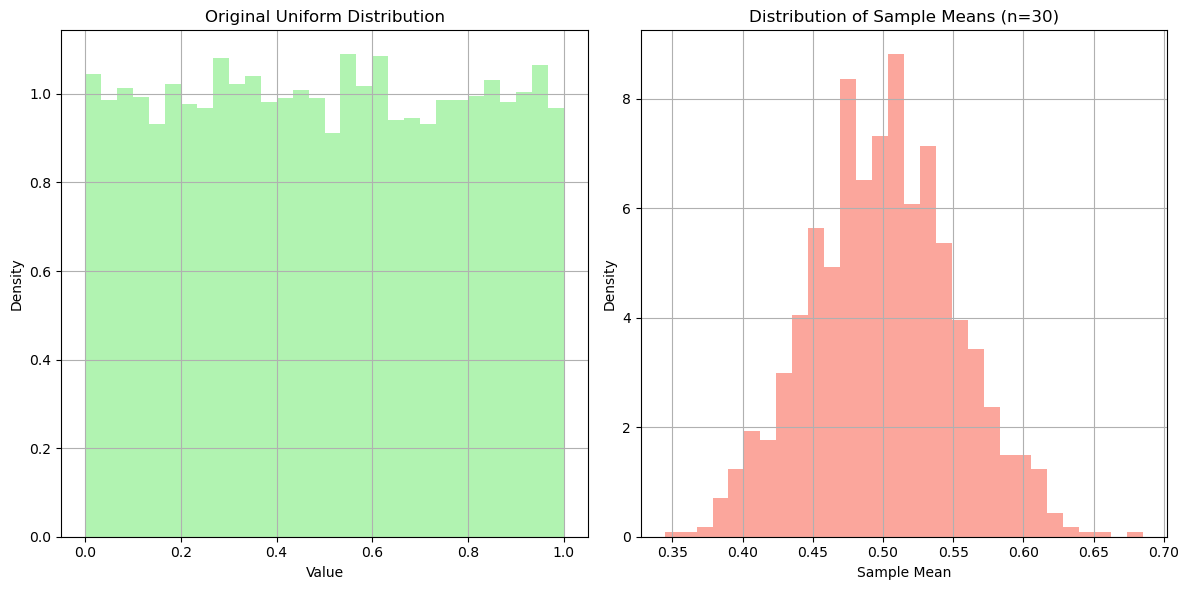

In [21]:
# 6. Central Limit Theorem
print("6. Central Limit Theorem")

# a. Generate 10,000 random numbers from a uniform distribution [cite: 16]
num_uniform_samples = 10000
uniform_data = np.random.uniform(0, 1, num_uniform_samples) # Uniform distribution from 0 to 1 [cite: 17]

# b. Draw 1000 samples of size n=30 [cite: 17]
num_clt_samples = 1000
sample_size_clt = 30
sample_means = []

for _ in range(num_clt_samples):
    # Draw a sample of size n from the uniform data
    sample = np.random.choice(uniform_data, size=sample_size_clt, replace=True)
    sample_means.append(np.mean(sample))

# c. Calculate and visualize the distribution of sample means.
plt.figure(figsize=(12, 6))

# Plot the uniform distribution [cite: 18]
plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

# Plot the distribution of sample means [cite: 18]
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, density=True, color='salmon', alpha=0.7)
plt.title(f'Distribution of Sample Means (n={sample_size_clt})')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()
